In [1]:
import os
import pandas as pd
import random
import shutil

data_path = r'C:\Users\chloe\OneDrive\Desktop\swallow EMG\data\participants\chloe\extracted signals'
class_folders = os.listdir(data_path)

In [2]:
os.chdir("..") 
from src import feature_extraction, models, utils, results

exclude = ['oral prep 0', 'grape 5', 'popcorn 1', 'carrot 5', 'chewing 0']
df, class_map = feature_extraction.make_df(data_path, exclude, rectify=True, smooth=True)

df

substance volume         1                                               \
                           min        max        mav        rms  wavelength   
0           0     10  4.048766  31.491611  13.269799  15.983017  121.064531   
1           0     10  2.897307  44.138337  13.145008  17.403641  117.505624   
2           0     10  3.823778  37.322908  13.577676  17.053714  119.996187   
3           0     10  4.759027  59.070049  15.893624  21.570193  160.878567   
4           0     10  3.895344  43.687753  15.732191  19.653157  148.868249   
..        ...    ...       ...        ...        ...        ...         ...   
318         6     20  3.596057  30.567810  13.175806  15.965831  111.069365   
319         6     20  3.298448  38.339321  15.148103  18.661716  138.720397   
320         6     20  4.074855  38.012117  14.441241  17.704473  132.296123   
321         6     20  3.227274  34.253892  14.297142  16.952415  129.387561   
322         6     20  3.559554  42.320230  18.192366  21.434507  166.894565   

                                                  ...            21  \
            var abs_diffs_signal shannon_entropy  ...          iemg   
0     79.369260       121.064531        4.152415  ...  3.682119e+06   
1    130.095476       117.505624        3.946859  ...  5.121828e+06   
2    106.475852       119.996187        4.129872  ...  4.846534e+06   
3    212.665947       160.878567        3.644752  ...  5.080956e+06   
4    138.744764       148.868249        4.186148  ...  6.607309e+06   
..          ...              ...             ...  ...           ...   
318   81.305895       111.069365        4.279945  ...  4.205661e+06   
319  118.794595       138.720397        4.344750  ...  4.946890e+06   
320  104.898900       132.296123        4.190116  ...  5.028630e+06   
321   82.976118       129.387561        4.429073  ...  4.423376e+06   
322  128.475886       166.894565        4.353866  ...  5.480031e+06   

              22                                                        \
             min           max          mav          rms    wavelength   
0     811.517098  10254.067421  4160.525055  4797.580885  42344.937861   
1    1134.028806   7284.127035  4732.225093  5082.750706  35483.547913   
2    2055.983139  10689.107727  5253.063454  5745.841460  41318.822622   
3    2236.906197  11258.437547  6172.775416  6633.529734  51258.260069   
4    1467.620296  10885.543931  6398.996538  6920.252785  46493.145332   
..           ...           ...          ...          ...           ...   
318  1118.832725   9977.774234  3873.296022  4452.540820  38110.847811   
319  1320.658422  12546.572653  4783.514686  5549.885568  44689.314091   
320  1455.461439   7971.611966  5237.853551  5449.926943  39949.527254   
321  1364.742711   9324.434424  4703.579645  5261.086038  41878.047649   
322  1434.208725   9726.578295  4558.438117  4877.981834  38954.661174   

                                                                  
              var abs_diffs_signal shannon_entropy          iemg  
0    5.706814e+06     42344.937861        4.465845  3.852646e+06  
1    3.440400e+06     35483.547913        4.677517  4.382040e+06  
2    5.420018e+06     41318.822622        4.606192  4.864337e+06  
3    5.900560e+06     51258.260069        4.677946  5.715990e+06  
4    6.942742e+06     46493.145332        4.603497  5.925471e+06  
..            ...              ...             ...           ...  
318  4.822698e+06     38110.847811        4.396972  3.586672e+06  
319  7.919217e+06     44689.314091        4.295648  4.429535e+06  
320  2.266594e+06     39949.527254        4.586802  4.850252e+06  
321  5.555365e+06     41878.047649        4.541410  4.355515e+06  
322  3.015349e+06     38954.661174        4.300758  4.221114e+06  

[323 rows x 200 columns]

# Single Label Classification
### Substance Classification

----------------------------
Accuracy: 0.9077
Precision: 0.9265
Recall: 0.9077
F1 score: 0.9013


C:\Users\chloe\AppData\Local\Temp\ipykernel_44400\1622658804.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = df.drop(columns=['volume', 'substance'])


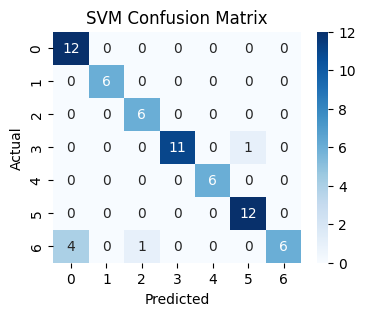

----------------------------
Accuracy: 0.8923
Precision: 0.9181
Recall: 0.8923
F1 score: 0.8874


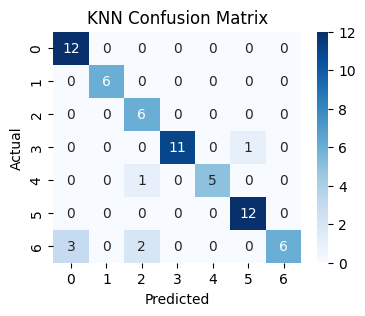

----------------------------
Accuracy: 0.7692
Precision: 0.8027
Recall: 0.7692
F1 score: 0.7533


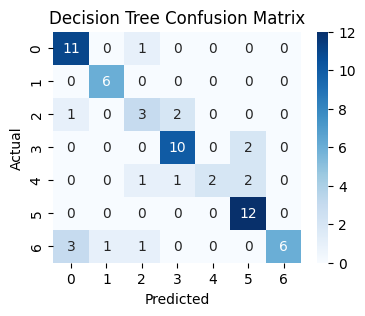

----------------------------
Accuracy: 0.8462
Precision: 0.8497
Recall: 0.8462
F1 score: 0.8423


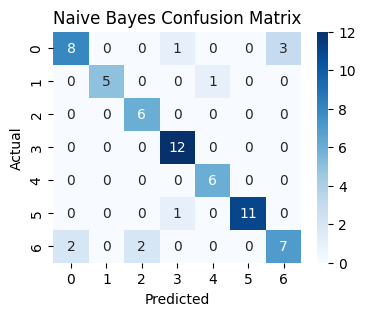

----------------------------
Accuracy: 0.9538
Precision: 0.9594
Recall: 0.9538
F1 score: 0.9535


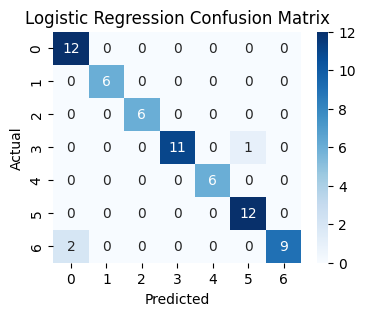

----------------------------
Accuracy: 0.8923
Precision: 0.8947
Recall: 0.8923
F1 score: 0.8883


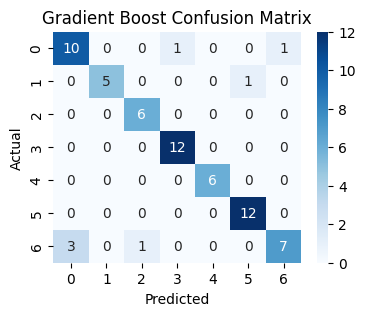

In [3]:
x = df.drop(columns=['volume', 'substance'])
y = df['substance']

sub_accuracies, sub_precisions, sub_recalls, sub_f1_scores = models.train_single_models(x, y, 42)

### Model Comparison

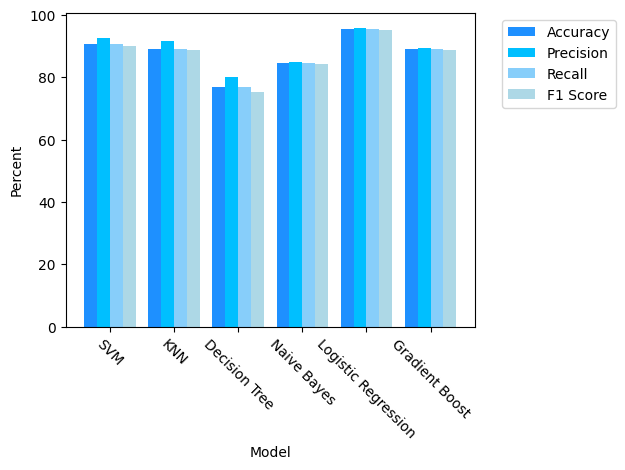

In [4]:
results.plot_single_models(sub_accuracies, sub_precisions, sub_recalls, sub_f1_scores)

### Volume

----------------------------
Accuracy: 0.9231
Precision: 0.9239
Recall: 0.9231
F1 score: 0.9232


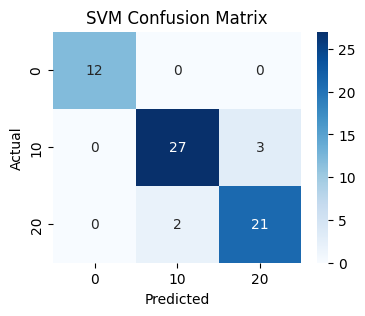

----------------------------
Accuracy: 0.9385
Precision: 0.9457
Recall: 0.9385
F1 score: 0.9375


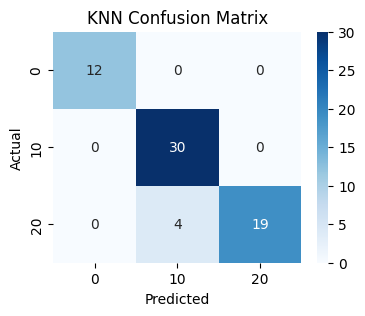

----------------------------
Accuracy: 0.8000
Precision: 0.8067
Recall: 0.8000
F1 score: 0.8016


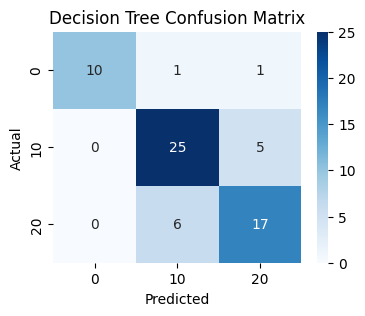

----------------------------
Accuracy: 0.7385
Precision: 0.7364
Recall: 0.7385
F1 score: 0.7307


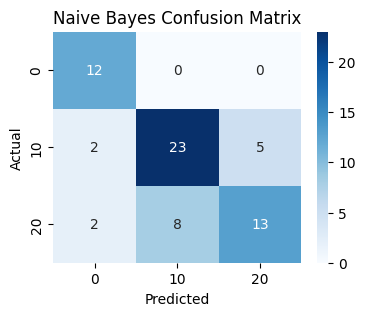

----------------------------
Accuracy: 0.8769
Precision: 0.8842
Recall: 0.8769
F1 score: 0.8779


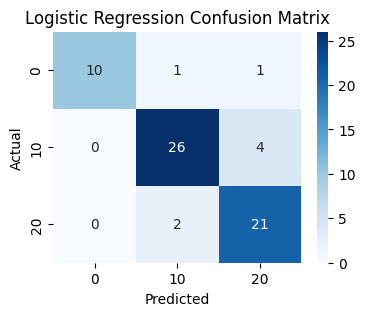

----------------------------
Accuracy: 0.9385
Precision: 0.9395
Recall: 0.9385
F1 score: 0.9385


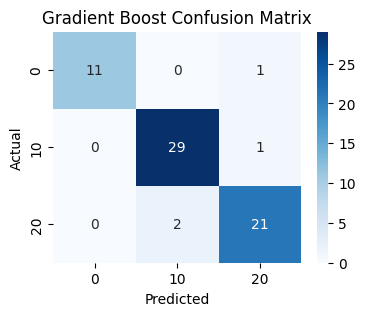

In [5]:
y = df['volume']

vol_accuracies, vol_precisions, vol_recalls, vol_f1_scores = models.train_single_models(x, y, 42)

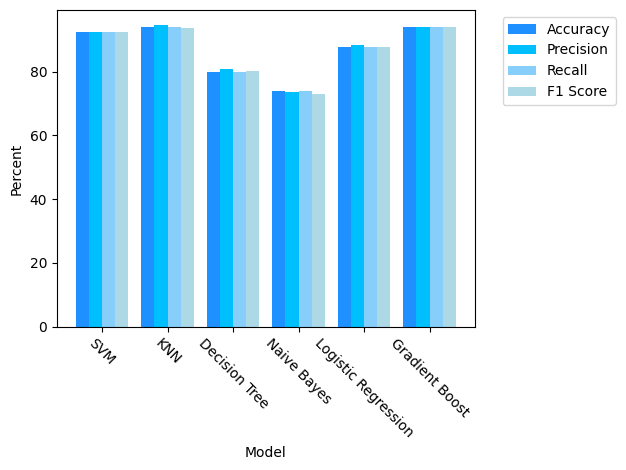

In [6]:
results.plot_single_models(vol_accuracies, vol_precisions, vol_recalls, vol_f1_scores)

# Multi Label Classification

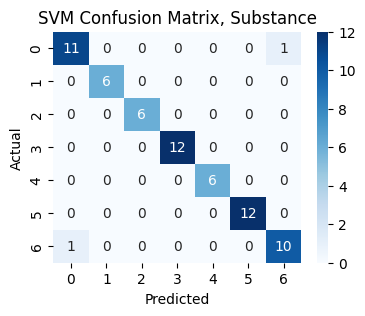

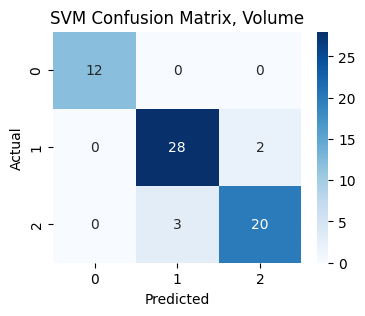

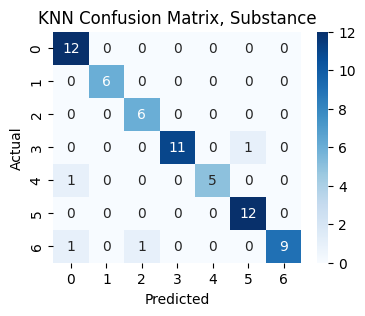

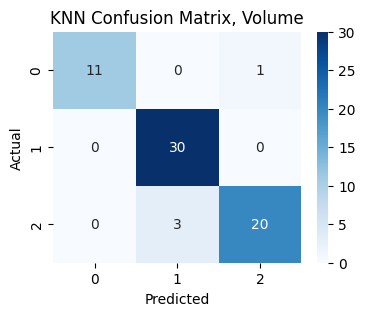

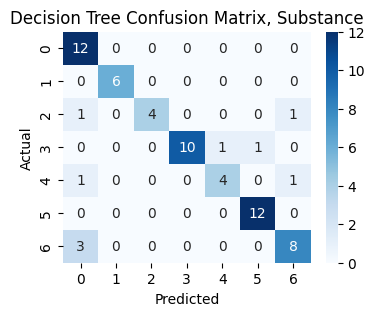

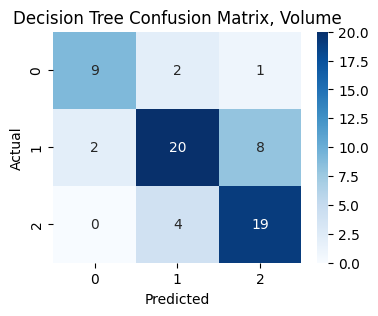

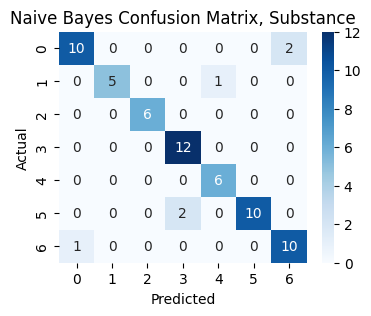

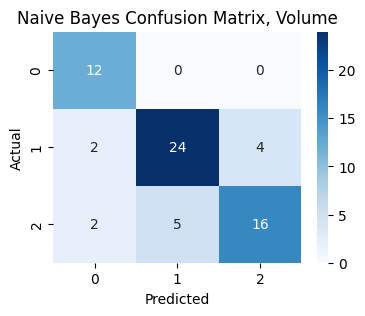

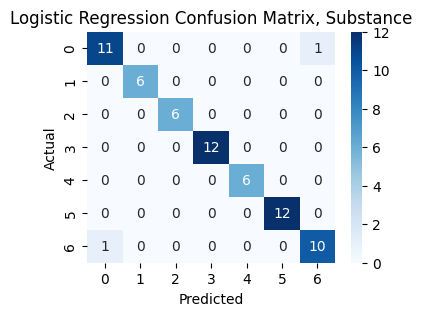

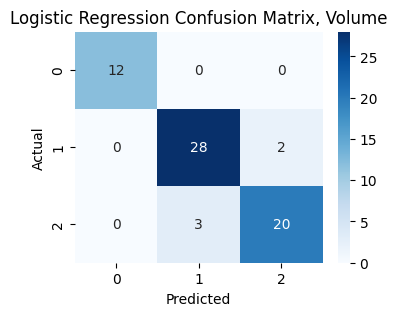

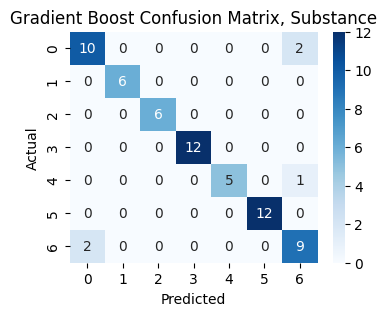

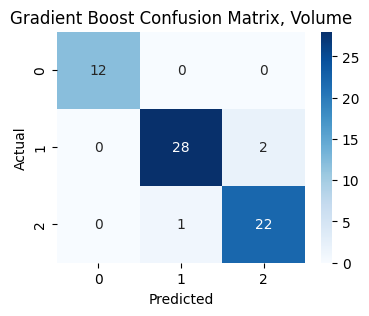

SVM
Exact Match Accuracy: 89.2308
Per-Label Accuracies: [96.92307692 92.30769231]
----------------------------
KNN
Exact Match Accuracy: 90.7692
Per-Label Accuracies: [93.84615385 93.84615385]
----------------------------
Decision Tree
Exact Match Accuracy: 67.6923
Per-Label Accuracies: [86.15384615 73.84615385]
----------------------------
Naive Bayes
Exact Match Accuracy: 70.7692
Per-Label Accuracies: [90.76923077 80.        ]
----------------------------
Logistic Regression
Exact Match Accuracy: 89.2308
Per-Label Accuracies: [96.92307692 92.30769231]
----------------------------
Gradient Boost
Exact Match Accuracy: 89.2308
Per-Label Accuracies: [92.30769231 95.38461538]
----------------------------


In [7]:
y = df[['substance', 'volume']]
exact_accuracies, label_accuracies = models.train_multioutput_models(x, y, 42, True, True)

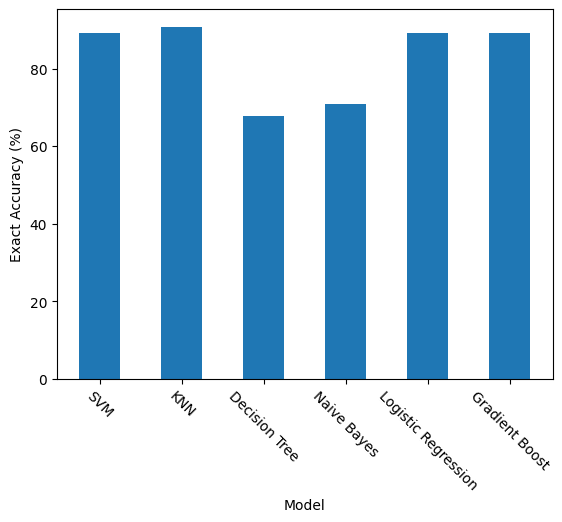

In [8]:
results.plot_accuracy(exact_accuracies)

In [9]:
import csv

output_path = r'C:\Users\chloe\OneDrive\Desktop\swallow EMG\outputs\classification\smoothed_accuracies.csv'

with open(output_path, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(exact_accuracies)

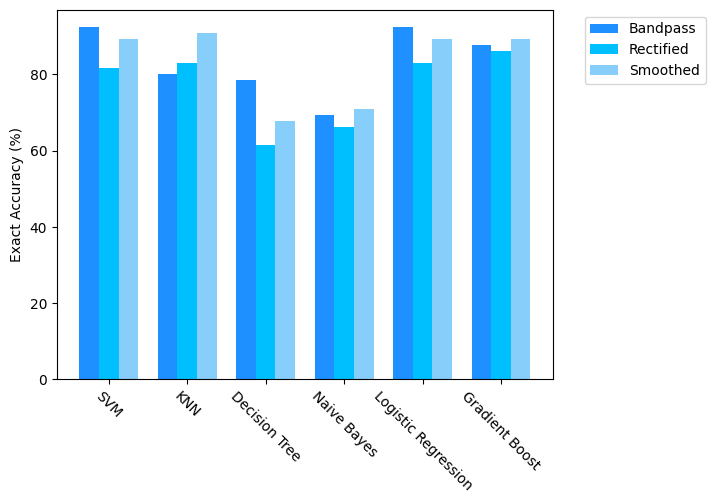

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from src.models import single_models

bandpass_accuracies_df = pd.read_csv('outputs/classification/bandpass_accuracies.csv', header=None)
bandpass_accuracies = bandpass_accuracies_df.iloc[0].tolist()

rectified_accuracies_df = pd.read_csv('outputs/classification/rectified_accuracies.csv', header=None)
rectified_accuracies = rectified_accuracies_df.iloc[0].tolist()

x = np.arange(len(single_models))  # [0, 1, 2]
width = 0.25  # width of each bar

# Plot bars side by side
plt.bar(x - width, bandpass_accuracies, width, label='Bandpass', color='dodgerblue')
plt.bar(x, rectified_accuracies, width, label='Rectified', color='deepskyblue')
plt.bar(x + width, exact_accuracies, width, label='Smoothed', color='lightskyblue')

# Add labels
model_names = [name for name, _ in single_models]

plt.xticks(x, model_names, rotation=-45)
plt.ylabel('Exact Accuracy (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()